<h1>Homework</h1>

The objective is to create a regression model using machine learning. 

You can work with the data science salary or pick a new dataset from [Kaggle](https://www.kaggle.com/datasets?tags=14203-Regression) .

If you are selecting a new dataset be mindful of the "usability" score as it is an indication of how much work you will have to put on pre processing the data.

You can use the lecture notebooks as a guide but you are free to use any methods and tools you like.

Don't forget that understanding the data is part of the process.

And, above all, try to enjoy the process and be kind to yourself when you get stuck.

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

df_electricity = pd.read_csv('electricityConsumptionAndProductioction.csv',sep=',',index_col=0)


In [214]:
df_electricity.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [140]:
df_electricity.tail()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2023-03-12 19:00:00,6500,6643,1407,111,3084,933,1047,0,60
2023-03-12 20:00:00,6471,6484,1408,58,2983,933,1042,0,60
2023-03-12 21:00:00,6194,6413,1406,39,2938,935,1031,0,62
2023-03-12 22:00:00,5708,6217,1406,8,2823,917,1001,0,61
2023-03-12 23:00:00,5409,5900,1403,0,2492,914,1030,0,60


In [141]:
len(df_electricity)

36772

In [215]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36772 entries, 2019-01-01 00:00:00 to 2023-03-12 23:00:00
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Consumption    36772 non-null  int64
 1   Production     36772 non-null  int64
 2   Nuclear        36772 non-null  int64
 3   Wind           36772 non-null  int64
 4   Hydroelectric  36772 non-null  int64
 5   Oil and Gas    36772 non-null  int64
 6   Coal           36772 non-null  int64
 7   Solar          36772 non-null  int64
 8   Biomass        36772 non-null  int64
dtypes: int64(9)
memory usage: 2.8+ MB


In [143]:
df_electricity.corr()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
Consumption,1.000000,0.732282,0.124541,0.091779,0.371311,0.509918,0.434893,0.174150,0.334124
Production,0.732282,1.000000,0.106552,0.516937,0.449501,0.451766,0.328335,0.123323,0.272738
Nuclear,0.124541,0.106552,1.000000,0.118649,-0.406881,0.233989,-0.015764,-0.145087,0.264480
Wind,0.091779,0.516937,0.118649,1.000000,-0.187258,0.025437,-0.158186,-0.120268,0.134089
Hydroelectric,0.371311,0.449501,-0.406881,-0.187258,1.000000,-0.124115,0.055678,0.150180,-0.075001
Oil and Gas,0.509918,0.451766,0.233989,0.025437,-0.124115,1.000000,0.247594,-0.172778,0.431457
Coal,0.434893,0.328335,-0.015764,-0.158186,0.055678,0.247594,1.000000,-0.032569,0.002068
Solar,0.174150,0.123323,-0.145087,-0.120268,0.150180,-0.172778,-0.032569,1.000000,-0.113577
Biomass,0.334124,0.272738,0.264480,0.134089,-0.075001,0.431457,0.002068,-0.113577,1.000000


In [144]:
df_electricity.describe()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000
mean,6707.924889,6543.770478,1293.468590,785.700723,1801.603149,1181.630017,1270.038236,151.524094,58.730828
std,1034.961146,1005.486125,237.348752,681.508967,678.981785,422.487653,306.550193,222.768784,13.363835
min,4081.000000,3315.000000,612.000000,-26.000000,175.000000,213.000000,279.000000,0.000000,18.000000
25%,5895.750000,5833.000000,1349.000000,226.000000,1310.000000,881.000000,1080.000000,0.000000,49.000000
50%,6686.000000,6492.000000,1386.000000,577.000000,1708.000000,1216.000000,1254.000000,2.000000,61.000000
75%,7434.000000,7210.000000,1409.000000,1195.250000,2184.000000,1502.000000,1467.000000,268.000000,68.000000
max,9615.000000,9886.000000,1457.000000,2811.000000,4359.000000,2141.000000,2537.000000,869.000000,89.000000


In [145]:
df_electricity.isnull().values.any()

False

In [221]:
df_electricity.keys()

Index(['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric',
       'Oil and Gas', 'Coal', 'Solar', 'Biomass'],
      dtype='object')

In [193]:
df_electricity[0:100]

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...
2019-01-04 23:00:00,7065,7147,1382,108,1805,2013,1796,0,41
2019-01-05 00:00:00,6720,6832,1382,87,1586,1983,1750,0,41
2019-01-05 01:00:00,6496,6333,1391,52,1138,1972,1740,0,41


In [303]:
# df_electricity = df_electricity.set_index(['date'])
# df_electricity['DateTime'] = pd.to_datetime(df_electricity['DataTime'])
# df_electricity['DateTime'] = df_electricity.Date.dt.strftime('%Y-%m-%d %S:%M:%H')
Sum_of2019 = df_electricity.loc['2019-01-01':'2019-31-12'].sum()
Sum_of2020 = df_electricity.loc['2020-01-01':'2020-31-12'].sum()
Sum_of2021 = df_electricity.loc['2021-01-01':'2021-31-12'].sum()
Sum_of2022 = df_electricity.loc['2022-01-01':'2022-31-12'].sum()
Sum_of2023 = df_electricity.loc['2020-01-01':'2020-31-12'].sum()
print(Sum_of2019)
print(Sum_of2020)
print(Sum_of2021)
print(Sum_of2022)
print(Sum_of2023)

Consumption      60095244
Production       58628819
Nuclear          11283025
Wind              6689349
Hydroelectric    15666624
Oil and Gas       9317685
Coal             13856141
Solar             1377855
Biomass            430290
dtype: int64
Consumption      58178816
Production       55456365
Nuclear          11488605
Wind              6895426
Hydroelectric    15432767
Oil and Gas      10176796
Coal              9623010
Solar             1352381
Biomass            478143
dtype: int64
Consumption      60944608
Production       58831071
Nuclear          11307834
Wind              6494488
Hydroelectric    17455342
Oil and Gas      10718906
Coal             10962525
Solar             1294143
Biomass            587656
dtype: int64
Consumption      56296223
Production       55208770
Nuclear          11112946
Wind              6886616
Hydroelectric    14077507
Oil and Gas      10622246
Coal             10554229
Solar             1383189
Biomass            561798
dtype: int64
Consumption 

<AxesSubplot:>

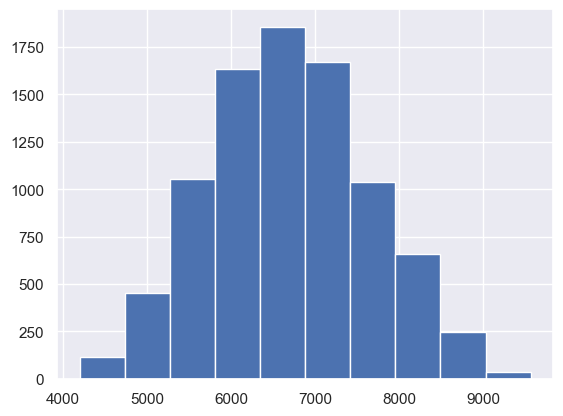

In [306]:
df_electricity.loc['2019-01-01':'2019-31-12'].Production.hist()

In [242]:
df_electricity.loc['2020-01-01':'2020-31-12'].sum()

Consumption      58178816
Production       55456365
Nuclear          11488605
Wind              6895426
Hydroelectric    15432767
Oil and Gas      10176796
Coal              9623010
Solar             1352381
Biomass            478143
dtype: int64

In [147]:
df_electricity.diff()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 01:00:00,-236.0,-826.0,-2.0,17.0,-271.0,-467.0,-103.0,0.0,0.0
2019-01-01 02:00:00,-243.0,-25.0,0.0,46.0,-82.0,36.0,-25.0,0.0,0.0
2019-01-01 03:00:00,-191.0,-73.0,4.0,49.0,-58.0,-10.0,-58.0,0.0,0.0
2019-01-01 04:00:00,-125.0,-149.0,-4.0,-32.0,-12.0,-1.0,-100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2023-03-12 19:00:00,360.0,110.0,-1.0,-138.0,149.0,20.0,82.0,-1.0,1.0
2023-03-12 20:00:00,-29.0,-159.0,1.0,-53.0,-101.0,0.0,-5.0,0.0,0.0
2023-03-12 21:00:00,-277.0,-71.0,-2.0,-19.0,-45.0,2.0,-11.0,0.0,2.0


In [148]:
df_electricity.at_time

<bound method NDFrame.at_time of                      Consumption  Production  Nuclear  Wind  Hydroelectric  \
DateTime                                                                     
2019-01-01 00:00:00         6352        6527     1395    79           1383   
2019-01-01 01:00:00         6116        5701     1393    96           1112   
2019-01-01 02:00:00         5873        5676     1393   142           1030   
2019-01-01 03:00:00         5682        5603     1397   191            972   
2019-01-01 04:00:00         5557        5454     1393   159            960   
...                          ...         ...      ...   ...            ...   
2023-03-12 19:00:00         6500        6643     1407   111           3084   
2023-03-12 20:00:00         6471        6484     1408    58           2983   
2023-03-12 21:00:00         6194        6413     1406    39           2938   
2023-03-12 22:00:00         5708        6217     1406     8           2823   
2023-03-12 23:00:00         540

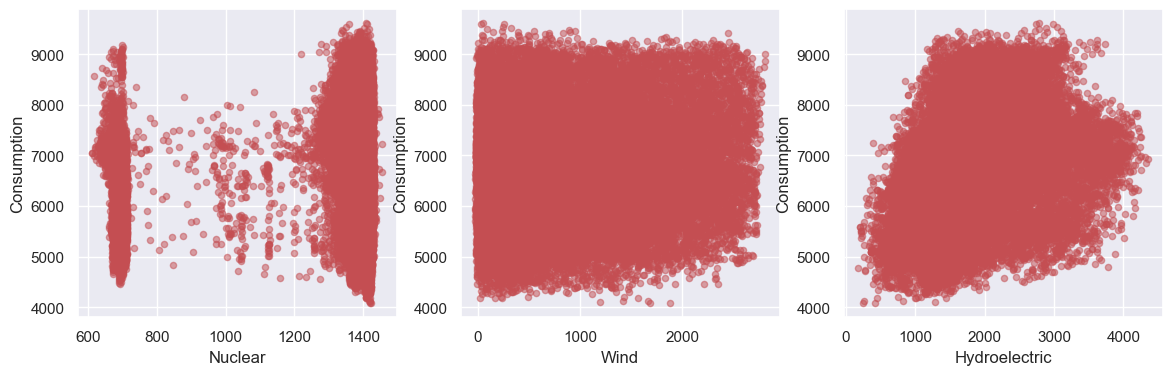

In [149]:
fig, axes=plt.subplots(nrows=1, ncols=3, figsize=(14,4))  
for xcol, ax in zip([ 'Nuclear', 'Wind', 'Hydroelectric'], axes):
    df_electricity.plot(kind='scatter', x=xcol, y='Consumption', ax=ax, alpha=0.5, color='r')

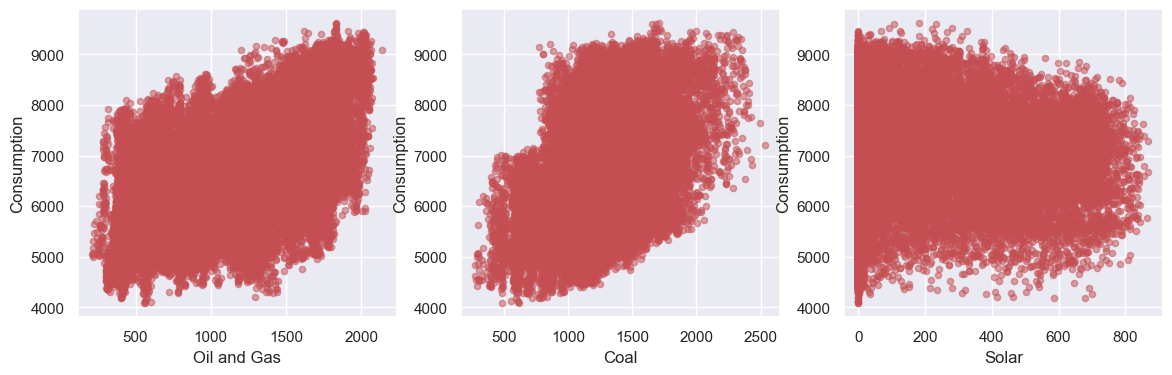

In [150]:
fig, axes=plt.subplots(nrows=1, ncols=3, figsize=(14,4))  
for xcol, ax in zip([ 'Oil and Gas', 'Coal', 'Solar'], axes):
    df_electricity.plot(kind='scatter', x=xcol, y='Consumption', ax=ax, alpha=0.5, color='r')

<AxesSubplot:>

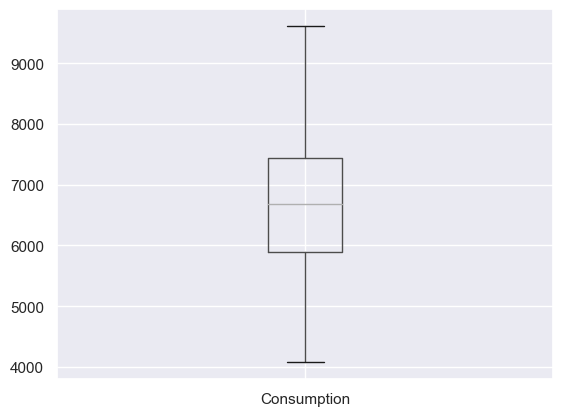

In [152]:
df_electricity.boxplot(column='Consumption')

<AxesSubplot:>

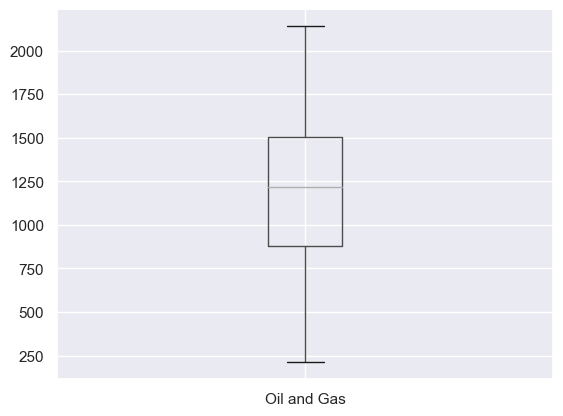

In [153]:
df_electricity.boxplot(column='Oil and Gas')

<AxesSubplot:>

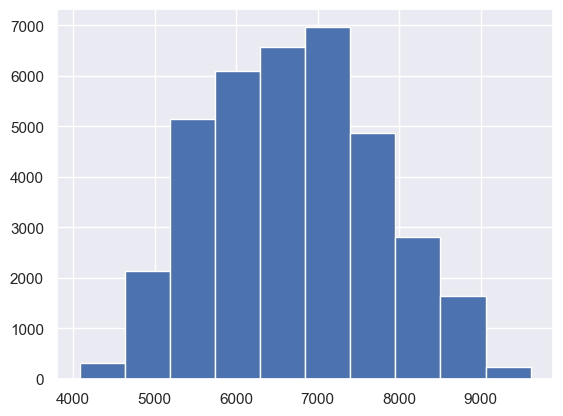

In [154]:
df_electricity.Consumption.hist()


<AxesSubplot:>

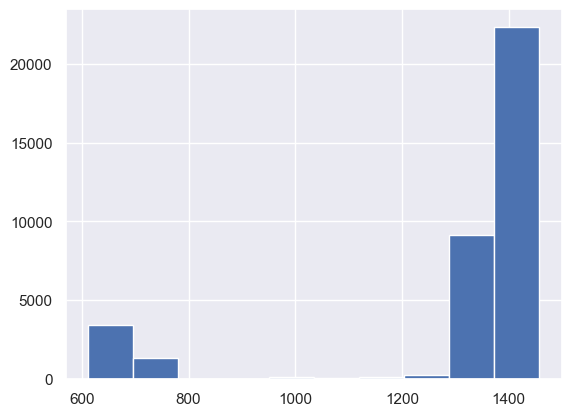

In [155]:
df_electricity.Nuclear.hist()

<AxesSubplot:>

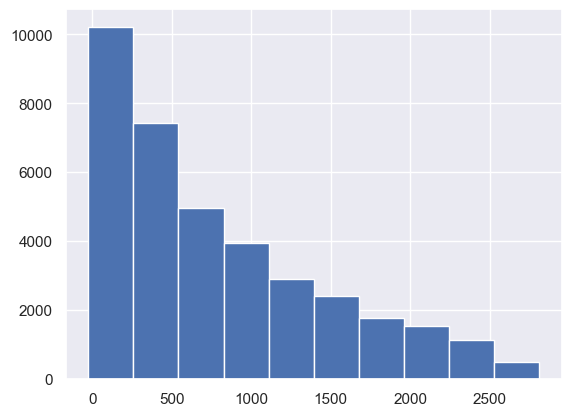

In [156]:
df_electricity.Wind.hist()

<AxesSubplot:>

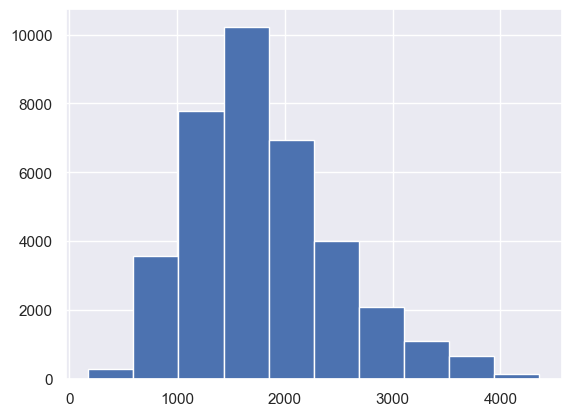

In [157]:
df_electricity.Hydroelectric.hist()

array([[<AxesSubplot:title={'center':'Oil and Gas'}>]], dtype=object)

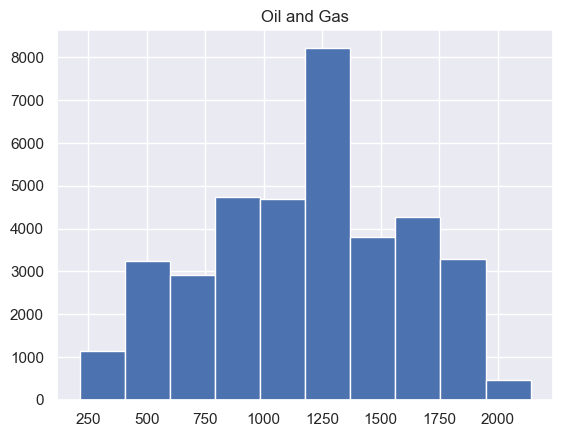

In [158]:
df_electricity.hist('Oil and Gas')

array([[<AxesSubplot:title={'center':'Coal'}>]], dtype=object)

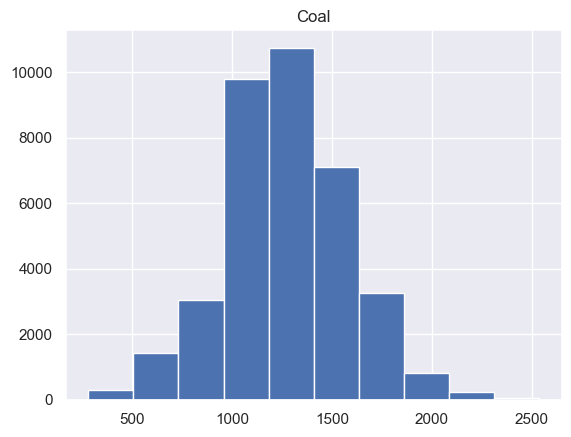

In [159]:
df_electricity.hist('Coal')

array([[<AxesSubplot:title={'center':'Solar'}>]], dtype=object)

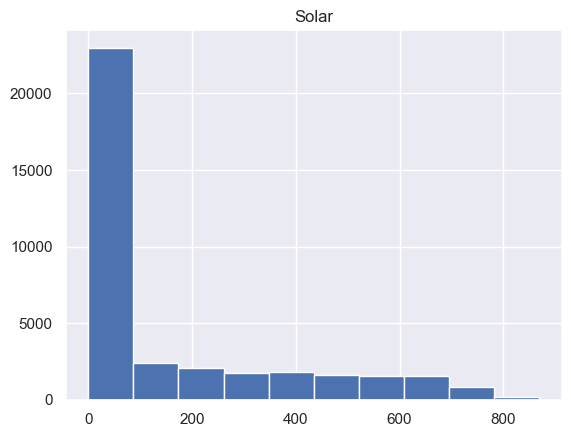

In [160]:
df_electricity.hist('Solar')

array([[<AxesSubplot:title={'center':'Biomass'}>]], dtype=object)

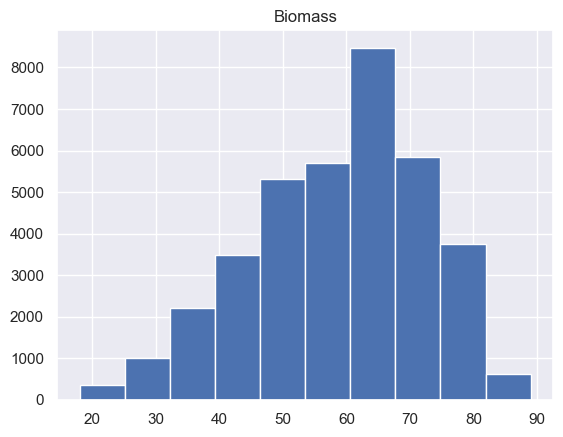

In [172]:
df_electricity.hist('Biomass')


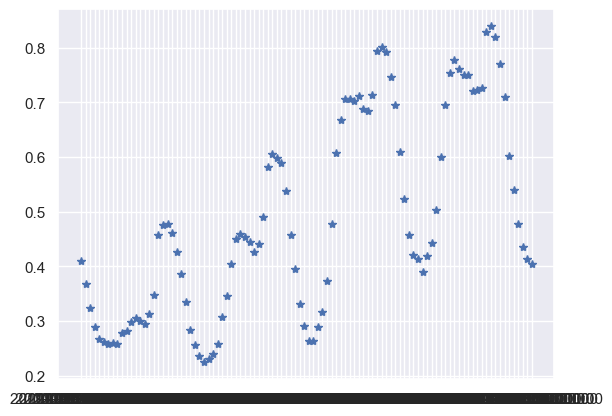

In [177]:
plt.plot(df_electricity.Consumption_sc[0:100], marker='*',linestyle='')

In [169]:
df_electricity.max()

Consumption      9615
Production       9886
Nuclear          1457
Wind             2811
Hydroelectric    4359
Oil and Gas      2141
Coal             2537
Solar             869
Biomass            89
dtype: int64

In [170]:
df_electricity.min()

Consumption      4081
Production       3315
Nuclear           612
Wind              -26
Hydroelectric     175
Oil and Gas       213
Coal              279
Solar               0
Biomass            18
dtype: int64

In [174]:
len(df_electricity)

36772

In [175]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [176]:
Electric_Consumption = df_electricity['Consumption'].to_numpy()
Electric_Consumption = Electric_Consumption.reshape(-1,1)
df_electricity['Consumption_sc'] = MinMaxScaler().fit_transform(Electric_Consumption)

In [178]:
train, test = train_test_split(df_electricity, random_state=21)

In [179]:
df_electricity.columns

Index(['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric',
       'Oil and Gas', 'Coal', 'Solar', 'Biomass', 'Consumption_sc'],
      dtype='object')

In [181]:
X_train = train[['Production', 'Nuclear', 'Wind', 'Hydroelectric','Oil and Gas', 'Coal', 'Solar', 'Biomass']]
X_test = test[['Production', 'Nuclear', 'Wind', 'Hydroelectric','Oil and Gas', 'Coal', 'Solar', 'Biomass']]

y_train = train['Consumption_sc']
y_test = test['Consumption_sc']

In [182]:
DTR = DecisionTreeRegressor(random_state=21)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

(-0.04759667509938564, 1.0496747379833755)

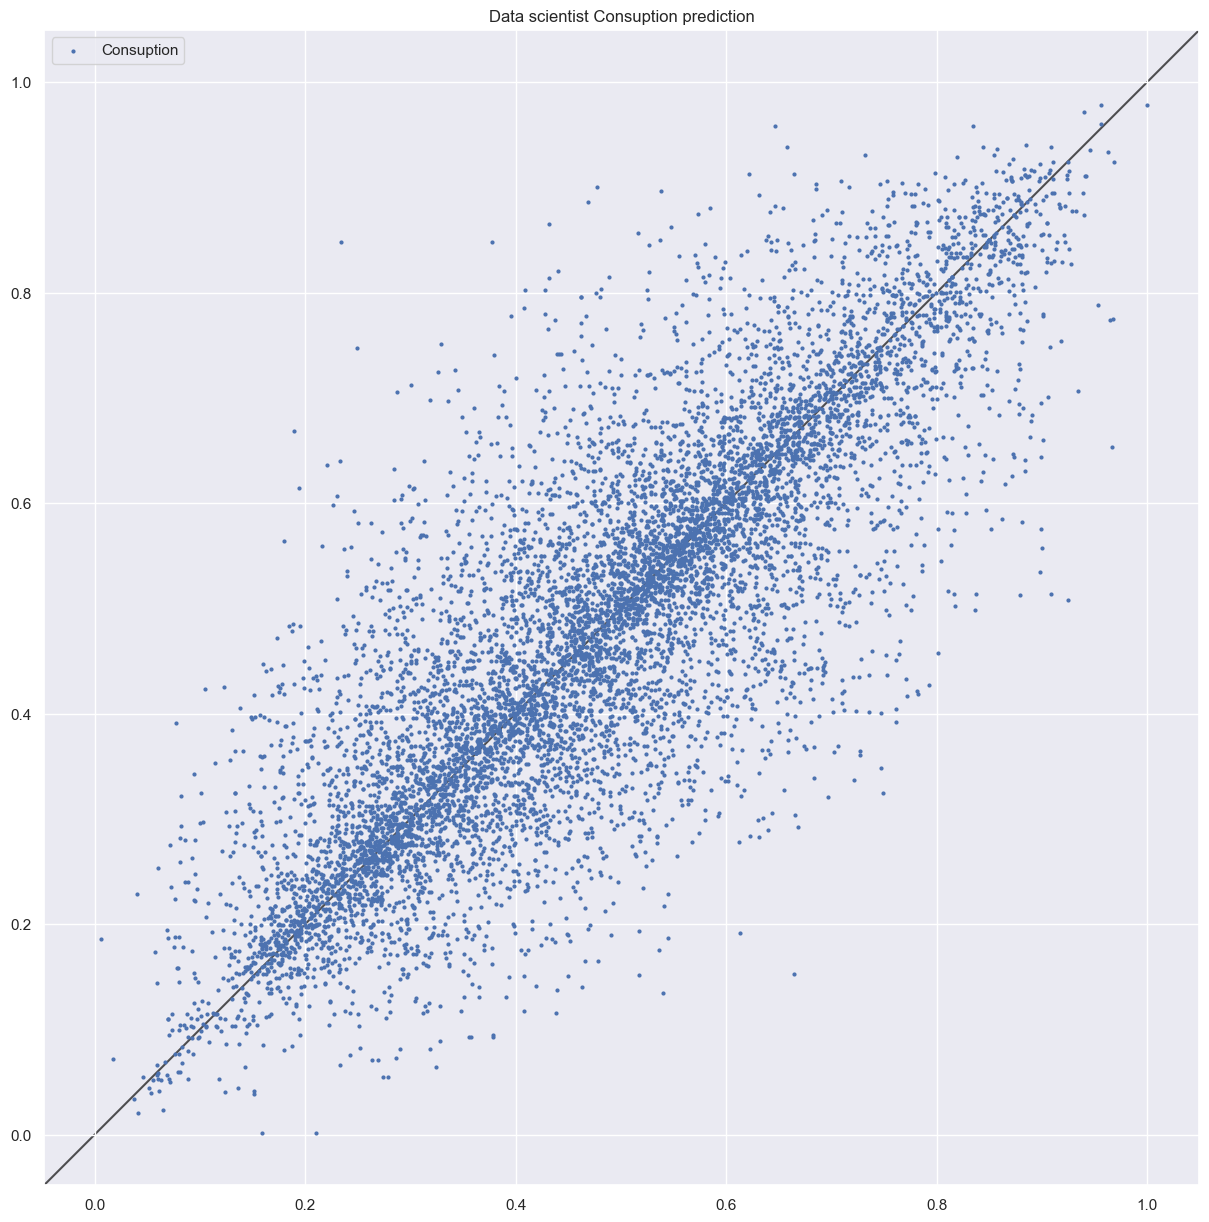

In [183]:
fig, ax = plt.subplots(1,1,figsize=(30,15))

ax.scatter(y_test,y_pred, s=4, label='Consuption')

ax.set_title(f'Data scientist Consuption prediction')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

(0.19899710878207447, 1.0050144560896277)

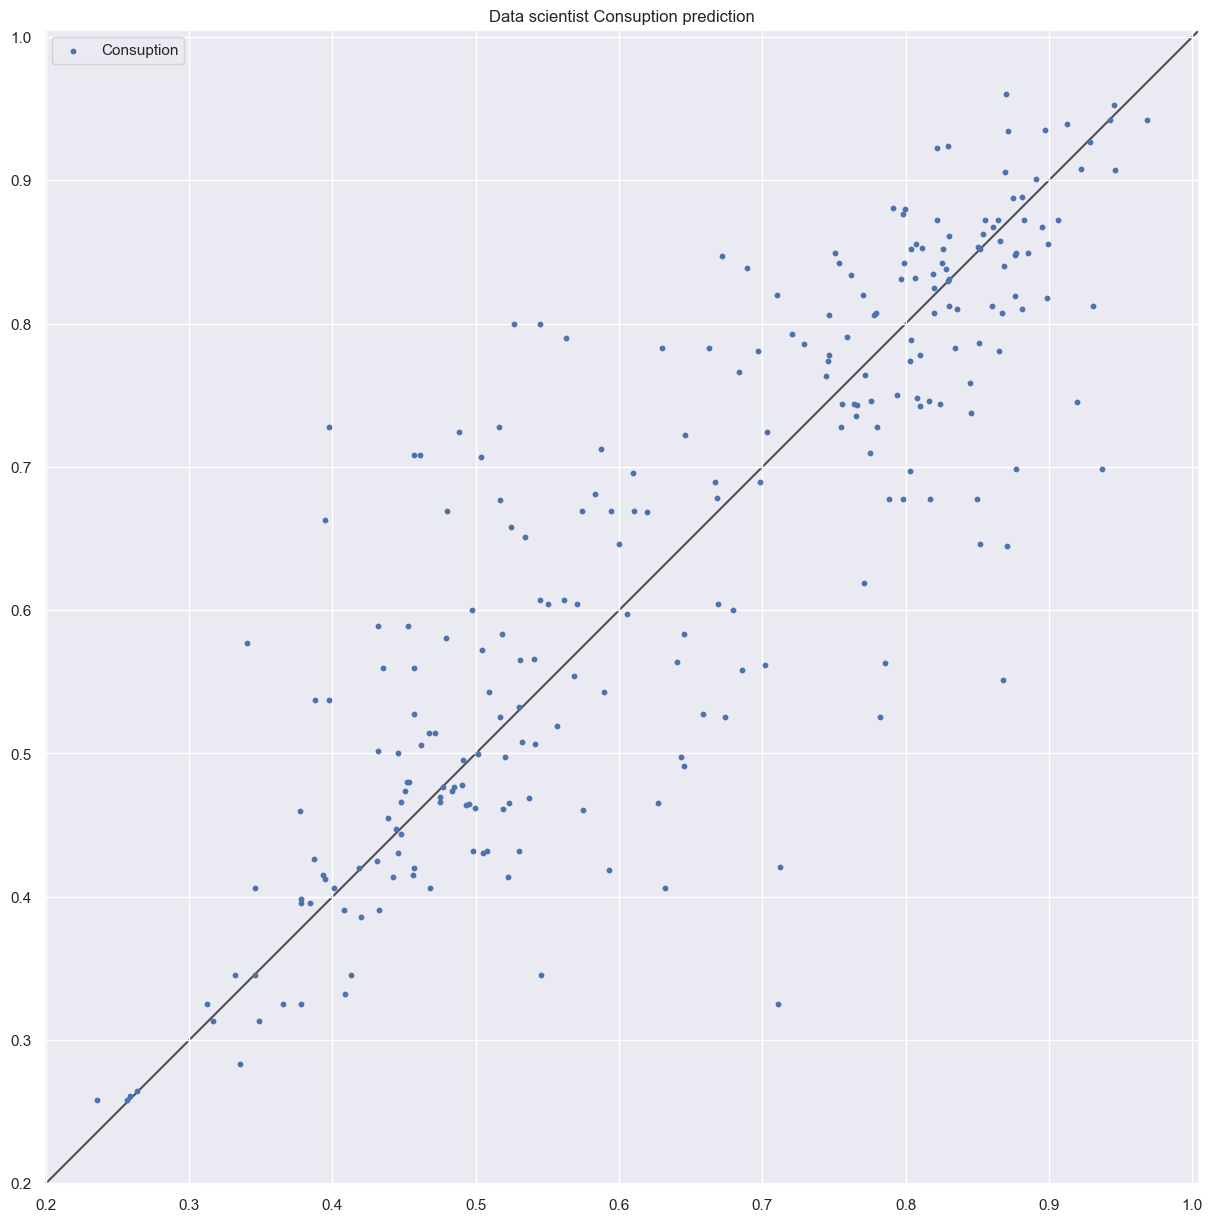

In [184]:
train, test = train_test_split(df_electricity[0:1000], random_state=21)

X_train = train[['Production', 'Nuclear', 'Wind', 'Hydroelectric','Oil and Gas', 'Coal', 'Solar', 'Biomass']]
X_test = test[['Production', 'Nuclear', 'Wind', 'Hydroelectric','Oil and Gas', 'Coal', 'Solar', 'Biomass']]

y_train = train['Consumption_sc']
y_test = test['Consumption_sc']

DTR = DecisionTreeRegressor(random_state=21)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

fig, ax = plt.subplots(1,1,figsize=(30,15))

ax.scatter(y_test,y_pred, s=10, label='Consuption')

ax.set_title(f'Data scientist Consuption prediction')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


In [263]:
df_2019 = df_electricity.loc['2019-01-01':'2019-31-12']
df_2020 = df_electricity.loc['2020-01-01':'2020-31-12']
df_2021 = df_electricity.loc['2021-01-01':'2021-31-12']
df_2022 = df_electricity.loc['2022-01-01':'2022-31-12']
df_2023 = df_electricity.loc['2023-01-01':'2023-31-12']

(4273.05, 9683.8)

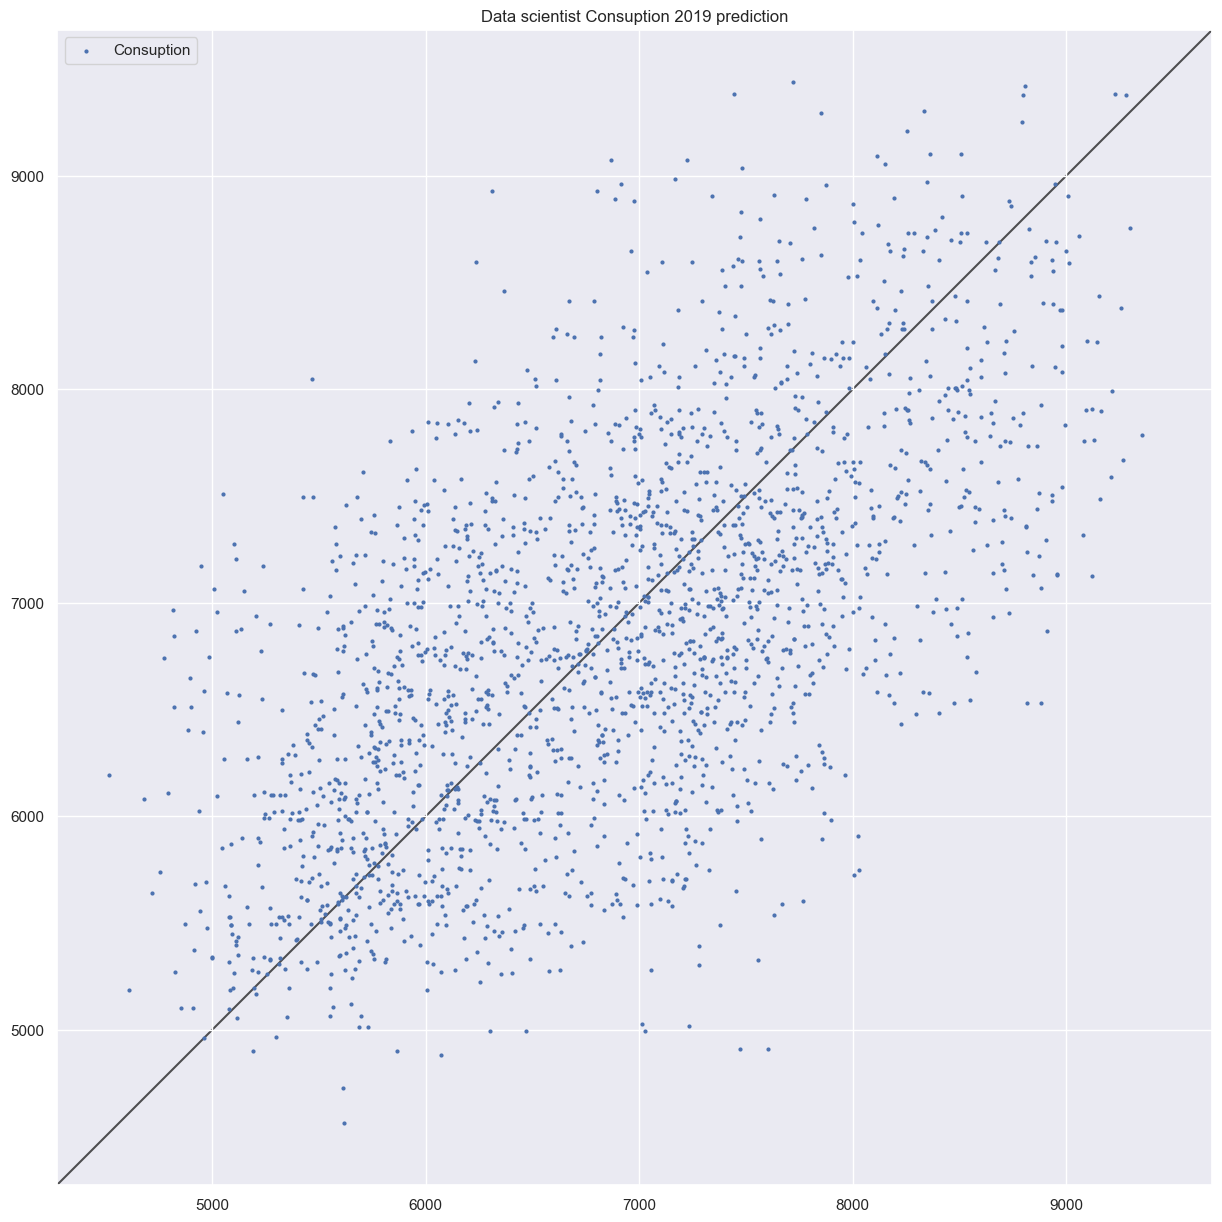

In [269]:
train, test = train_test_split(df_2019, random_state=30)

X_train = train[['Production']]
X_test = test[['Production']]

y_train = train['Consumption']
y_test = test['Consumption']

DTR = DecisionTreeRegressor(random_state=30)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

fig, ax = plt.subplots(1,1,figsize=(30,15))

ax.scatter(y_test,y_pred, s=4, label='Consuption')

ax.set_title(f'Data scientist Consuption 2019 prediction')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


(3859.05, 9533.95)

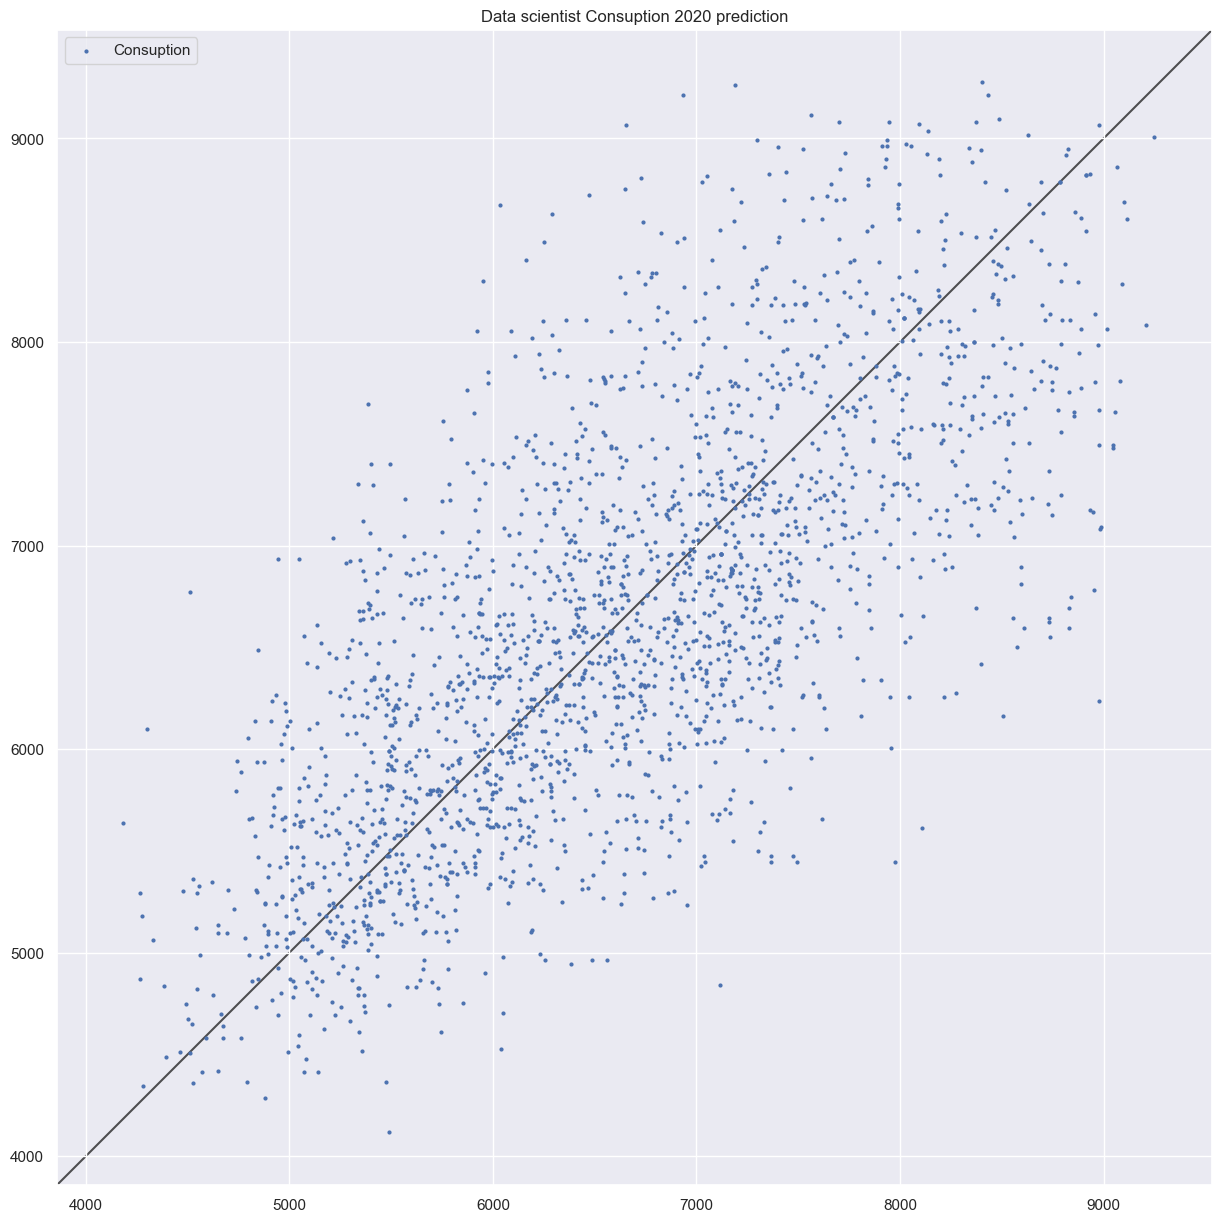

In [268]:
train, test = train_test_split(df_2020, random_state=55)

X_train = train[['Production']]
X_test = test[['Production']]

y_train = train['Consumption']
y_test = test['Consumption']

DTR = DecisionTreeRegressor(random_state=55)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

fig, ax = plt.subplots(1,1,figsize=(30,15))

ax.scatter(y_test,y_pred, s=4, label='Consuption')

ax.set_title(f'Data scientist Consuption 2020 prediction')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

(0.19441633538127934, 0.8706360679436214)

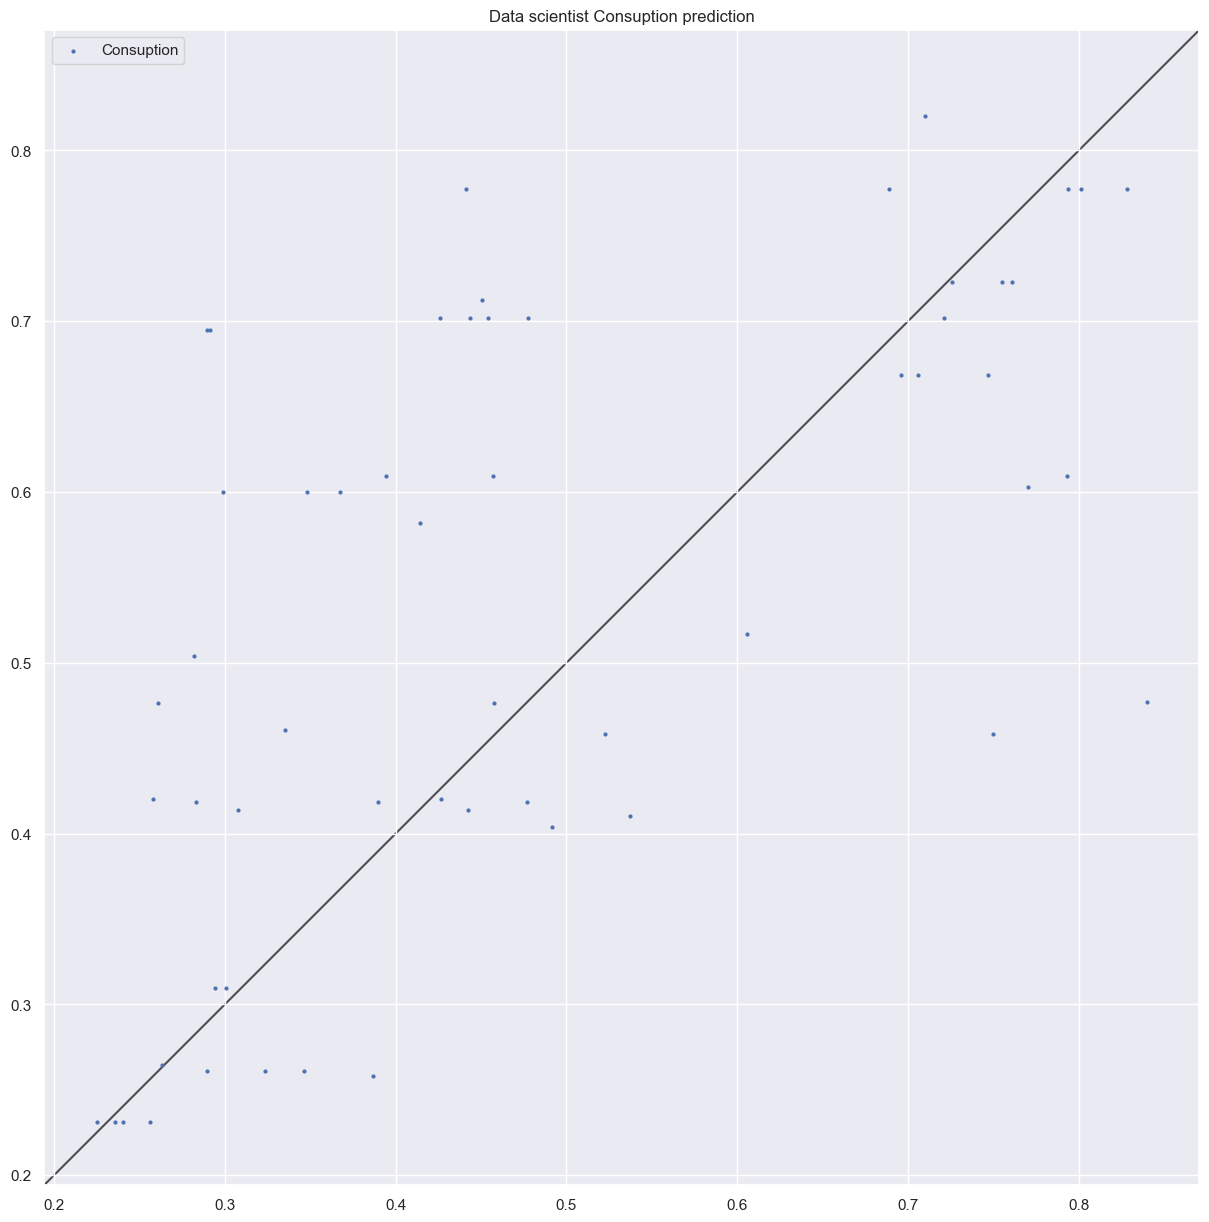

In [186]:
train, test = train_test_split(df_electricity[0:100], test_size=0.55, random_state=21)

X_train = train[['Oil and Gas']]
X_test = test[['Oil and Gas']]

y_train = train['Consumption_sc']
y_test = test['Consumption_sc']

DTR = DecisionTreeRegressor(random_state=21)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

fig, ax = plt.subplots(1,1,figsize=(30,15))

ax.scatter(y_test,y_pred, s=4, label='Consuption')

ax.set_title(f'Data scientist Consuption prediction')

ax.legend()

# Adding an x=y line.
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
